<a href="https://colab.research.google.com/github/julianafalves/Credit-Card-Fraud-Detection/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Trabalho 1 - Aprendizado de Máquina 2

* Bruno Leonel Nunes, RA: 770214
* Júlia Almeida, RA: 772116
* Juliana Ferreira Alves, RA: 744794

###Análise de transições fraudulentas utilizando cartões de crédito com modelo de Aprendizado Semi-Supervisionado e One-Class Classification

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt, style # for ploting
import seaborn as sns # for ploting
from sklearn.metrics import fbeta_score, precision_score, recall_score, confusion_matrix # for evaluation
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import classification_report
from sklearn.ensemble import IsolationForest
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de confusão',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Copyed from a kernel by joparga3 https://www.kaggle.com/joparga3/kernels
    """
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Classe verdadeira')
    plt.xlabel('Classe predita')
    plt.show()

In [ ]:
df = pd.read_csv("creditcard.csv") #upar o CSV no colab antes de rodar essa célula
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


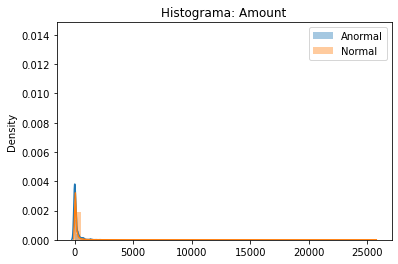

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


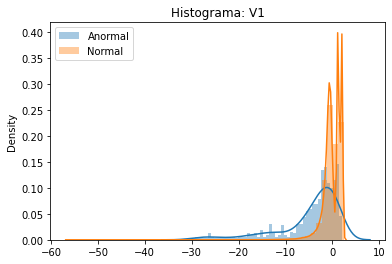

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


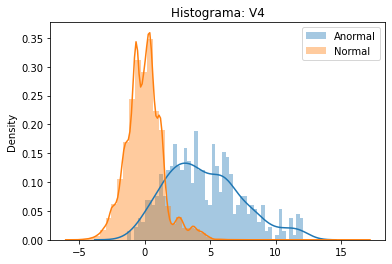

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


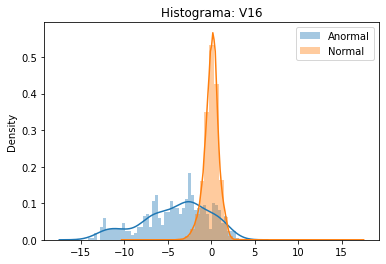

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


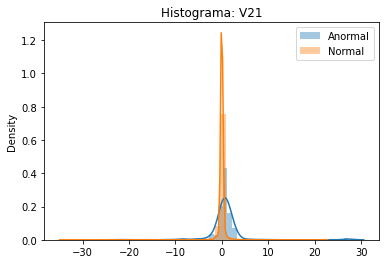

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


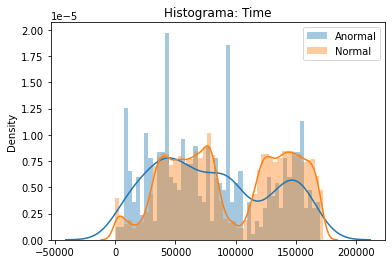

In [ ]:
for feature in ['Amount', 'V1', 'V4', 'V16', 'V21', 'Time']:
    ax = plt.subplot()
    sns.distplot(df[feature][df.Class == 1], bins=50, label='Anormal')
    sns.distplot(df[feature][df.Class == 0], bins=50, label='Normal')
    ax.set_xlabel('')
    ax.set_title('Histograma: ' + str(feature))
    plt.legend(loc='best')
    plt.show()

TSNE

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


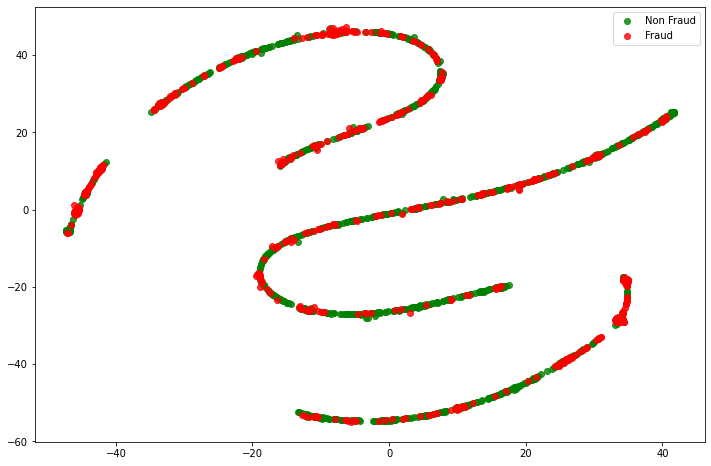

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
non_fraud = df[df['Class'] == 0].sample(1000)
fraud = df[df['Class'] == 1]

df = non_fraud.append(fraud).sample(frac=1).reset_index(drop=True)
X = df.drop(['Class'], axis = 1).values
Y = df["Class"].values

def tsne_plot(x1, y1, name="graph.png"):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='Non Fraud')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='Fraud')

    plt.legend(loc='best');
    plt.savefig(name);
    plt.show();
    
tsne_plot(X, Y, "original.png")

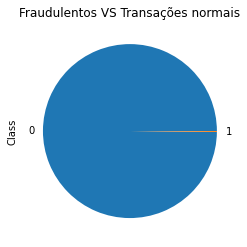

In [ ]:
df.groupby(['Class']).Class.count().plot(kind='pie', title='Fraudulentos VS Transações normais')

#Tranformando Time e Amount em valores logaritmos uma vez que não estão tão semelhantes aos V's. Além disso, separando o dataset em dados normais ( classe 0 ) e dados anormais ( classe 1).

In [ ]:
# time and amount scaling
df['Time'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1, 1))
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))

df_anom = df[df['Class'] == 1]
df_norm = df[df['Class'] == 0]
 
df_test_norm = df_norm.sample(20000)
df_test = pd.concat([
    df_anom,
    df_test_norm
])
df_train = df_norm.drop(df_test_norm.index)[:20000]

feature_cols = [_ for _ in df.columns if _ != 'Class']

In [ ]:
X_train = df_train[feature_cols]
y_train = df_train['Class'] 
X_test = df_test[feature_cols]
y_test = df_test['Class'] 



print('''
train: [{:>8} x {:<5}]
 test: [{:>8} x {:<5}]
'''.format(*X_train.shape, *X_test.shape))


train: [   20000 x 30   ]
 test: [   20492 x 30   ]



#Label Propagation

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()
df1 = df
df1['scaled_amount'] = rob_scaler.fit_transform(df1['Amount'].values.reshape(-1,1))
df1['scaled_time'] = rob_scaler.fit_transform(df1['Time'].values.reshape(-1,1))

df1.drop(['Time','Amount'], axis=1, inplace=True)


df1.shape

(284807, 31)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold

print('Normais', round(df1['Class'].value_counts()[0]/len(df1) * 100,2), '%')
print('Anormais', round(df1['Class'].value_counts()[1]/len(df1) * 100,2), '%')

X = df1.drop('Class', axis=1)
y = df1['Class']


original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)


# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Normais 99.83 %
Anormais 0.17 %
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827075 0.00172925]
[0.99827955 0.00172045]


In [ ]:


df1 = pd.concat([original_Xtrain,original_ytrain],1).sample(frac=1)

# Quantidade de classes como fraude: 492 rows.
fraud_df = df1.loc[df['Class'] == 1]
non_fraud_df = df1.loc[df['Class'] == 0][:30000]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

#Embaralhando
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.reindex()

print('Normais', round(new_df['Class'].value_counts()[0]/len(new_df) * 100,2), '%')
print('Anormais', round(new_df['Class'].value_counts()[1]/len(new_df) * 100,2), '%')

new_df.shape

Normais 98.7 %
Anormais 1.3 %


<ipython-input-133-e81added162d>:5: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  df1 = pd.concat([original_Xtrain,original_ytrain],1).sample(frac=1)


(30394, 31)

In [ ]:
from sklearn.semi_supervised import LabelPropagation
lp = LabelPropagation()
xl_train , xl_test, yl_train, yl_test = train_test_split(new_df.drop('Class', axis=1), new_df[['Class']], test_size=0.2,stratify=new_df.Class)

print('x_train',xl_train.shape)
print('x_test' ,xl_test.shape)

x_train (24315, 30)
x_test (6079, 30)


In [ ]:
rng = np.random.RandomState(42)
random_unlabeled = rng.rand(len(yl_train)) < 0.8
yl_train[random_unlabeled] = -1

In [ ]:
lp = LabelPropagation(kernel='rbf', gamma=0.02, n_neighbors=7, max_iter=1000, tol=0.001, n_jobs=None)
lp.fit(xl_train, yl_train)
lp_pred = lp.predict(xl_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
lp_pred_f = np.array([y==-1 for y in lp_pred])

In [ ]:
print(classification_report(yl_test,lp_pred_f))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6000
           1       0.01      0.84      0.02        79

    accuracy                           0.01      6079
   macro avg       0.01      0.42      0.01      6079
weighted avg       0.00      0.01      0.00      6079



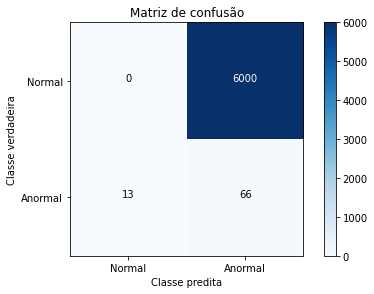

In [ ]:
cnf_matrix = confusion_matrix(yl_test, lp_pred_f)
plot_confusion_matrix(cnf_matrix, classes=['Normal','Anormal']
                      , title='Matriz de confusão')

#OneClassSVM


In [ ]:
model = OneClassSVM(gamma=0.000562, nu=.02, kernel='rbf')
model.fit(X_train)
pred = model.predict(X_test)
svm_pred = np.array([y==-1 for y in pred])


In [ ]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     20000
           1       0.42      0.82      0.55       492

    accuracy                           0.97     20492
   macro avg       0.71      0.89      0.77     20492
weighted avg       0.98      0.97      0.97     20492



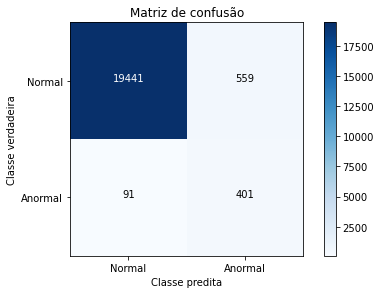

In [ ]:
cnf_matrix = confusion_matrix(y_test, svm_pred)
plot_confusion_matrix(cnf_matrix, classes=['Normal','Anormal']
                      , title='Matriz de confusão')

#IsolationForest

In [ ]:
iso_f = IsolationForest(n_estimators=300, contamination= 'auto')
iso_f.fit(X_train)
iso_pred = iso_f.predict(X_test)
scale_func = np.vectorize(lambda x: 1 if x == -1 else 0)
iso_f_pred = scale_func(iso_pred)

In [ ]:
print(classification_report(y_test,iso_f_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     20000
           1       0.29      0.85      0.43       492

    accuracy                           0.95     20492
   macro avg       0.64      0.90      0.70     20492
weighted avg       0.98      0.95      0.96     20492



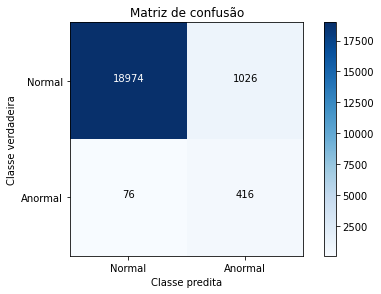

In [ ]:
cnf_matrix = confusion_matrix(y_test, iso_f_pred)
plot_confusion_matrix(cnf_matrix, classes=['Normal','Anormal']
                      , title='Matriz de confusão')

#GaussianMixture

In [ ]:
gmm = GaussianMixture(n_components=2, n_init=100, random_state=42)
gmm.fit(X_train)
gmm_pred = gmm.predict(X_test)


In [ ]:
print(classification_report(y_test,gmm_pred))

              precision    recall  f1-score   support

           0       0.97      0.76      0.85     20000
           1       0.01      0.05      0.01       492

    accuracy                           0.75     20492
   macro avg       0.49      0.41      0.43     20492
weighted avg       0.95      0.75      0.83     20492



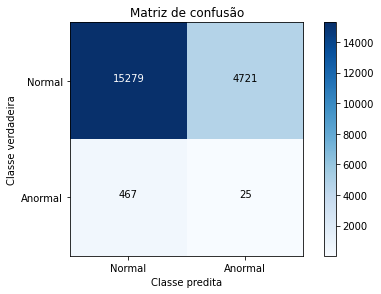

In [ ]:
cnf_matrix = confusion_matrix(y_test, gmm_pred)
plot_confusion_matrix(cnf_matrix, classes=['Normal','Anormal']
                      , title='Matriz de confusão')